In [1]:
import matplotlib.pyplot as plt
import json
import pandas as pd
import seaborn as sns

In [2]:
with open("../eval_results/perplexity/ppl_scaled_base.json") as f:
    data = json.load(f)

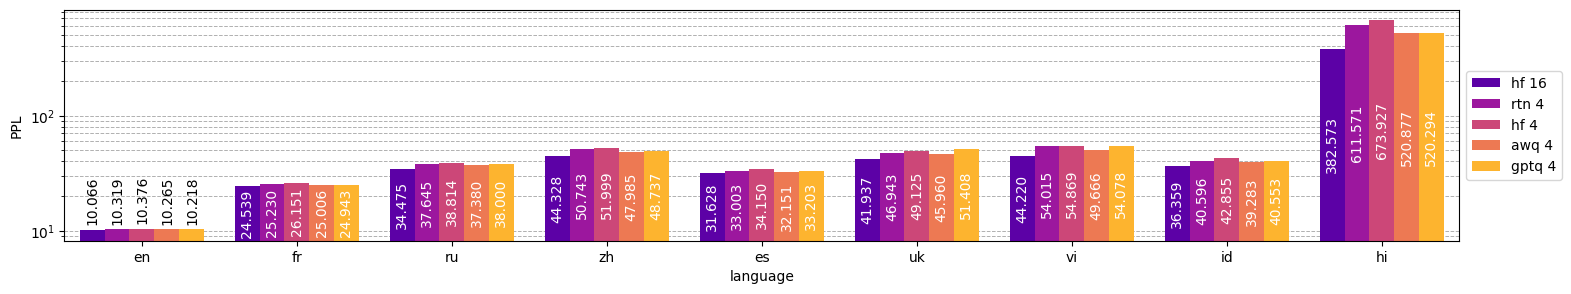

In [3]:
df = []
for lang in data:
    for quant in data[lang]:
        df.append([lang, quant, data[lang][quant]["perplexity"]])
df = pd.DataFrame(df, columns=["language", "quant", "PPL"])

plt.figure(figsize=(18, 3), dpi=100)

ax = sns.barplot(x="language", y="PPL", hue="quant", palette="plasma", data=df, saturation=1)
for container in ax.containers:
    labels = ax.bar_label(container, label_type="center", color="white", padding=0, fmt='%.3f')
    for n, label in enumerate(labels):
        if n == 0:
            label.set_color("black")
            label.set_position([0.5, 25])
        label.set_rotation(90)
plt.yscale("log")
# ax.set_ylim(0, 12)

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.grid(axis="y", which="both", zorder=-10000, linewidth=0.7, linestyle="--")
ax.set_axisbelow(True)
plt.show()

In [5]:
data.keys()

dict_keys(['en', 'fr', 'ru', 'zh', 'es', 'uk', 'vi', 'id', 'hi'])

In [6]:
# Based on the tokenized length of the concatenated FLORES sequences
raw_text_sizes = [31738, 45407, 51274, 60545, 45268, 53536, 88465, 54432, 137103]
text_sizes = [t / raw_text_sizes[0] for t in raw_text_sizes]
text_sizes

[1.0,
 1.4306824626630537,
 1.6155397315520827,
 1.9076501354842774,
 1.4263028546222194,
 1.6868107631230702,
 2.787352700233159,
 1.7150419056021173,
 4.319837418866974]

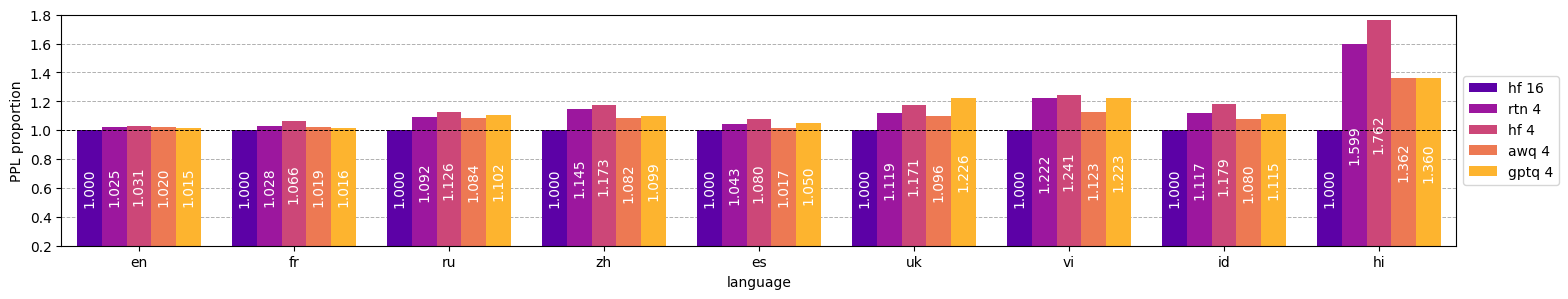

In [7]:
df = []
for n, lang in enumerate(data):
    for quant in data[lang]:
        df.append([lang, quant, data[lang][quant]["perplexity"]/data[lang]["hf 16"]["perplexity"]])
df = pd.DataFrame(df, columns=["language", "quant", "PPL proportion"])

plt.figure(figsize=(18, 3), dpi=100)

# plt.title("FLORES perplexity fraction proportional to the perplexity of the base model")

ax = sns.barplot(x="language", y="PPL proportion", hue="quant", palette="plasma", data=df, saturation=1)
for container in ax.containers:
    labels = ax.bar_label(container, label_type="center", color="white", padding=0, fmt='%.3f')
    for label in labels:
        label.set_rotation(90)
# plt.yscale("log")
ax.set_ylim(0.2, 1.8)
ax.axhline(1, color='black', linestyle='--', linewidth=0.7)


ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.grid(axis="y", which="both", zorder=-10000, linewidth=0.7, linestyle="--")
ax.set_axisbelow(True)
plt.show()

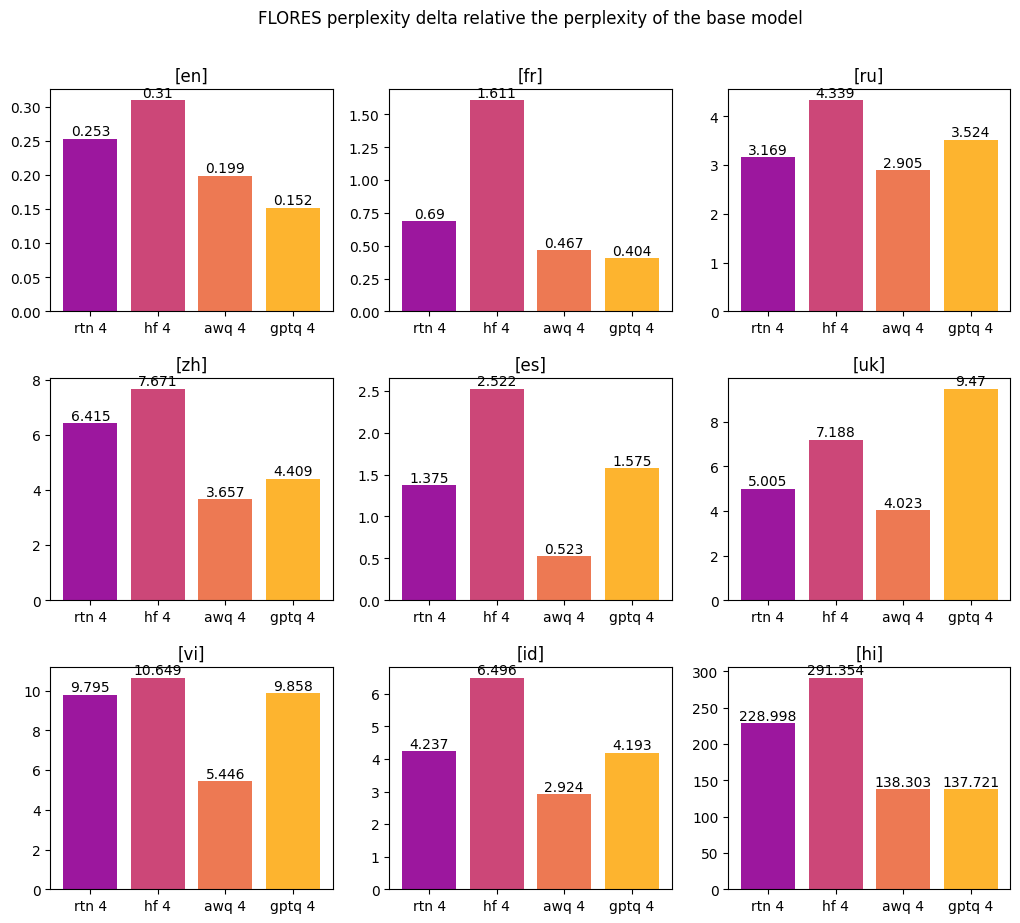

In [8]:
fig, axes = plt.subplots(3, 3, figsize=(12, 10), dpi=100)
axes = axes.reshape(-1)
fig.suptitle("FLORES perplexity delta relative the perplexity of the base model")
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.2, hspace=0.3)
for n, lang in enumerate(data.keys()):
    cmap = plt.get_cmap('plasma')
    # axes[n].set_ylim(-0.1, 10)
    axes[n].set_title(f"[{lang}]")
    for m, method in enumerate(list(data[lang].keys())[1:]):
        # if m == 0:
        #     axes[n].axhline(y=data[lang][method]["perplexity"], color='black', linestyle='--', linewidth=0.7)
        axes[n].axhline(0, color='black', linestyle='--', linewidth=0.5)
        col = cmap((m+2)/(len(data[lang].keys())+1))
        br = axes[n].bar(method, round(data[lang][method]["perplexity"]-data[lang]["hf 16"]["perplexity"], 3), color=col)
        axes[n].bar_label(br)


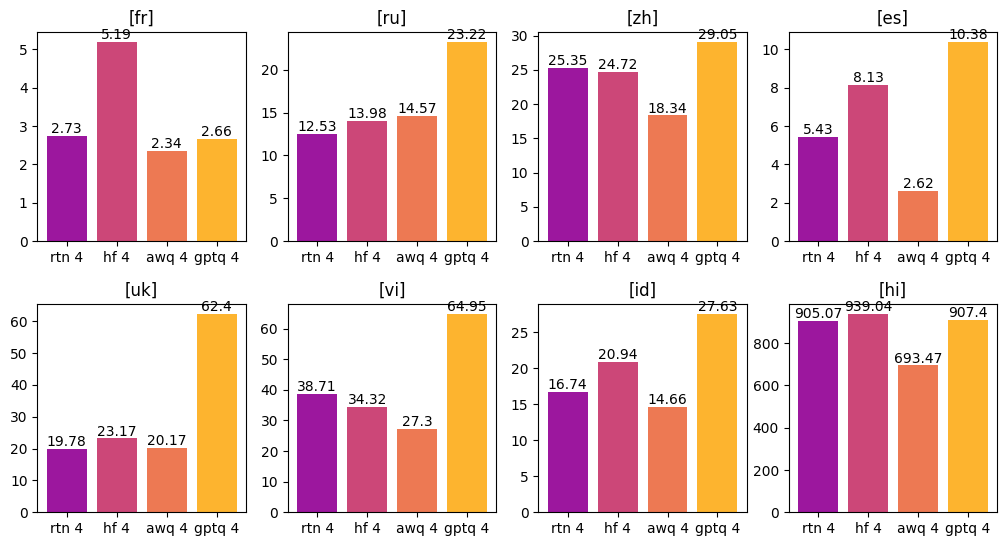

In [9]:
fig, axes = plt.subplots(2, 4, figsize=(12, 6), dpi=100)
axes = axes.reshape(-1)
# fig.suptitle("FLORES perplexity delta proportional to the [en] perplexity delta")
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.2, hspace=0.3)
for n, lang in enumerate(list(data.keys())[1:]):
    cmap = plt.get_cmap('plasma')
    # axes[n].set_ylim(0, 6.3)
    axes[n].set_title(f"[{lang}]")
    for m, method in enumerate(list(data[lang].keys())[1:]):
        # if m == 0:
        #     axes[n].axhline(y=data[lang][method]["perplexity"], color='black', linestyle='--', linewidth=0.7)
        col = cmap((m+2)/(len(data[lang].keys())+1))
        br = axes[n].bar(method, round((data[lang][method]["perplexity"]-data[lang]["hf 16"]["perplexity"])
                                       /(data["en"][method]["perplexity"]-data["en"]["hf 16"]["perplexity"]), 2), color=col)
        axes[n].bar_label(br)